In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns


def plot_publication_percentages_by_country(df):
    """
    Reads the aggregated publication counts CSV and creates a line plot for each country.
    For each country, it computes the percentage of publications per subfield (i.e.,
    number of publications of a subfield divided by the total publications for that year)
    for the top 5 subfields, and plots these percentages over the years 2019 to 2024.
    A common legend is displayed at the bottom.
    """
    # Load the CSV file and ensure publication_year is integer
    df["publication_year"] = df["publication_year"].astype(int)

    # Get unique country codes
    countries = df["country_code"].unique()

    # Setup seaborn theme for better visuals
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

    # Create a subplot grid: here we assume 4 countries and use a 2x2 grid (adjust as needed)
    n_countries = len(countries)
    n_rows = (n_countries + 1) // 2
    fig, axes = plt.subplots(
        n_rows, 2, figsize=(15, 5 * n_rows), sharex=True, sharey=True
    )
    axes = axes.flatten()

    # Dictionary to collect legend entries across subplots
    legend_entries = {}

    for i, country in enumerate(countries):
        ax = axes[i]
        # Filter data for the current country and work on a copy
        df_country = df[df["country_code"] == country].copy()

        # Compute the total publications per year for this country
        total_per_year = (
            df_country.groupby("publication_year")["count"]
            .sum()
            .reset_index(name="total")
        )
        df_country = df_country.merge(total_per_year, on="publication_year")

        # Calculate the percentage of publications for each subfield per year
        df_country["percentage"] = (df_country["count"] / df_country["total"]) * 100

        # Determine top 5 subfields (by total count over the period for that country)
        subfield_totals = (
            df_country.groupby("subfield_display_name")["count"].sum().reset_index()
        )
        top5 = subfield_totals.nlargest(5, "count")["subfield_display_name"].tolist()

        # Filter to only include rows for these top subfields
        df_top = df_country[df_country["subfield_display_name"].isin(top5)]

        # Create the line plot for percentages by publication year for the top subfields
        lineplot = sns.lineplot(
            data=df_top,
            x="publication_year",
            y="percentage",
            hue="subfield_display_name",
            style="subfield_display_name",
            markers=True,
            markersize=8,
            dashes=False,
            ax=ax,
            linewidth=1.5,
        )
        ax.set_title(f"Country: {country}")
        ax.set_xlabel("Publication Year")
        ax.set_ylabel("Percentage (%)")

        # Remove individual legends from subplots
        ax.get_legend().remove()

        # Collect legend handles and labels from the first subplot (assuming consistency across plots)
        if i == 0:
            handles, labels = lineplot.get_legend_handles_labels()
            for h, l in zip(handles, labels):
                legend_entries[l] = h

    # Hide any unused subplots if number of countries is less than the grid size
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Create a common legend from the collected legend entries
    common_handles = list(legend_entries.values())
    common_labels = list(legend_entries.keys())
    fig.legend(
        common_handles,
        common_labels,
        loc="lower center",
        ncol=5,
        bbox_to_anchor=(0.5, 0.01),
    )

    fig.suptitle(
        "Percentage of Publications per Subfield by Country (2019 - 2024)",
        fontsize=16,
        y=0.925,
    )
    fig.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig(
        "../docs/publication_percentages_by_country.pdf",
        format="pdf",
        bbox_inches="tight",
    )

    return fig


def plot_avg_citations_by_country(df):
    """
    Reads the aggregated publication counts CSV (for Brazil) and creates a line plot for each country.
    For each country, it computes the average citations per publication for each subfield per year
    (i.e., citation_count / count) for the top 5 subfields (by total publication count)
    and plots these average citations over the years 2019 to 2024.
    A common legend is displayed at the bottom.
    """
    # Ensure publication_year is integer
    df["publication_year"] = df["publication_year"].astype(int)

    # Compute average citations per publication for each row
    df["avg_citations"] = df["citation_count"] / df["count"]

    # Get unique country codes (should be one, but keeping the structure for consistency)
    countries = df["country_code"].unique()

    # Setup seaborn theme for better visuals
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

    # Create a subplot grid: here we assume 4 countries and use a 2x2 grid (adjust as needed)
    n_countries = len(countries)
    n_rows = (n_countries + 1) // 2
    fig, axes = plt.subplots(
        n_rows, 2, figsize=(15, 5 * n_rows), sharex=True, sharey=True
    )
    axes = axes.flatten()

    # Dictionary to collect legend entries across subplots
    legend_entries = {}

    for i, country in enumerate(countries):
        ax = axes[i]
        # Filter data for the current country and work on a copy
        df_country = df[df["country_code"] == country].copy()

        # Determine top 5 subfields (by total publication count over the period for that country)
        subfield_totals = (
            df_country.groupby("subfield_display_name")["count"].sum().reset_index()
        )
        top5 = subfield_totals.nlargest(5, "count")["subfield_display_name"].tolist()

        # Filter to only include rows for these top subfields
        df_top = df_country[df_country["subfield_display_name"].isin(top5)]

        # Create the line plot for average citations per publication by publication year for the top subfields
        lineplot = sns.lineplot(
            data=df_top,
            x="publication_year",
            y="avg_citations",
            hue="subfield_display_name",
            style="subfield_display_name",
            markers=True,
            markersize=8,
            dashes=False,
            ax=ax,
            linewidth=1.5,
        )
        ax.set_title(f"Country: {country}")
        ax.set_xlabel("Publication Year")
        ax.set_ylabel("Average Citations")

        # Remove individual legends from subplots
        ax.get_legend().remove()

        # Collect legend handles and labels from the first subplot (assuming consistency across plots)
        if i == 0:
            handles, labels = lineplot.get_legend_handles_labels()
            for h, l in zip(handles, labels):
                legend_entries[l] = h

    # Hide any unused subplots if number of countries is less than the grid size
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    # Create a common legend from the collected legend entries
    common_handles = list(legend_entries.values())
    common_labels = list(legend_entries.keys())
    fig.legend(
        common_handles,
        common_labels,
        loc="lower center",
        ncol=5,
        bbox_to_anchor=(0.5, 0.01),
    )

    fig.suptitle(
        "Average Citations per Publication by Subfield (2019 - 2024)",
        fontsize=16,
        y=0.93,
    )
    fig.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig(
        "../docs/avg_citations_by_country.pdf", format="pdf", bbox_inches="tight"
    )

    return fig


def plot_publication_percentages_by_country_elsevier(df):
    """
    Reads the aggregated publication counts CSV (with new format) and creates a line plot for each country.
    For each country, it computes the percentage of publications per area (i.e.,
    number of publications for an area divided by the total publications for that year,
    where the total is taken from the row with "All" in the Area column) for the top 5 areas.
    
    Each subplot uses fixed colours and markers (hard-coded) for the areas. A single common legend,
    containing the union of all areas from all subplots, is displayed at the bottom of the figure.
    
    The top 5 areas per country are defined as:
    
        Brazil:
            - CS Applications
            - Networks and Communications
            - Software
            - General CS
            - Artificial Intelligence
        
        United States:
            - CS Applications
            - Software
            - Networks and Communications
            - Artificial Intelligence
            - Information Systems
        
        China:
            - CS Applications
            - Networks and Communications
            - Artificial Intelligence
            - Software
            - Information Systems
        
        India:
            - Networks and Communications
            - CS Applications
            - Artificial Intelligence
            - General CS
            - Vision and Pattern Recognition
    
    The plot spans the years 2019 to 2024.
    """

    # Melt the wide-format DataFrame to long-format
    df_long = pd.melt(
        df,
        id_vars=["Country", "Area", "Overall"],
        value_vars=["2019", "2020", "2021", "2022", "2023", "2024"],
        var_name="publication_year",
        value_name="count",
    )
    df_long["publication_year"] = df_long["publication_year"].astype(int)

    # Extract total publication counts (where Area == "All") to use as denominator
    df_totals = (
        df_long[df_long["Area"] == "All"][["Country", "publication_year", "count"]]
        .rename(columns={"count": "total"})
    )

    # Merge the totals back onto the long DataFrame
    df_merged = pd.merge(df_long, df_totals, on=["Country", "publication_year"])

    # Exclude the 'All' rows from plotting since they serve as denominators
    df_merged = df_merged[df_merged["Area"] != "All"]

    # Compute the percentage for each area per year
    df_merged["percentage"] = (df_merged["count"] / df_merged["total"]) * 100

    # Define the top 5 areas for each country (as provided)
    top5_areas = {
        "Brazil": [
            "CS Applications",
            "Networks and Communications",
            "Software",
            "General CS",
            "Artificial Intelligence",
        ],
        "United States": [
            "CS Applications",
            "Software",
            "Networks and Communications",
            "Artificial Intelligence",
            "Information Systems",
        ],
        "China": [
            "CS Applications",
            "Networks and Communications",
            "Artificial Intelligence",
            "Software",
            "Information Systems",
        ],
        "India": [
            "Networks and Communications",
            "CS Applications",
            "Artificial Intelligence",
            "General CS",
            "Vision and Pattern Recognition",
        ],
    }

    # Define a manual colour mapping for all possible areas
    area_colors = {
        "CS Applications": "#ea801c", 
        "Networks and Communications": "#0d7d87", 
        "Software": "#7E4794",
        "General CS": "#5e4c5f",
        "Artificial Intelligence": "#8cc5e3", 
        "Information Systems": "#f55f74",
        "Vision and Pattern Recognition": "#1a80bb",
    }

    # Define a manual marker mapping for all possible areas
    marker_styles = {
        "CS Applications": "o", 
        "Networks and Communications": "v", 
        "Software": "D",
        "General CS": "^",
        "Artificial Intelligence": "s", 
        "Information Systems": "P",
        "Vision and Pattern Recognition": "*",
    }

    # Use the countries defined in the top5_areas dict (assumed to be present in the data)
    countries = list(top5_areas.keys())

    # Setup seaborn theme for improved visuals
    sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)

    # Create subplots: 2 columns and as many rows as needed
    n_countries = len(countries)
    n_rows = (n_countries + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows), sharex=True, sharey=True)
    axes = axes.flatten()

    legend_entries = {}

    for i, country in enumerate(countries):
        ax = axes[i]
        # Filter data for the current country
        df_country = df_merged[df_merged["Country"] == country].copy()

        # Filter to include only the top 5 areas for this country
        areas = top5_areas[country]
        df_country = df_country[df_country["Area"].isin(areas)]

        # Create a palette for this country's areas using the manual mapping
        palette = {area: area_colors[area] for area in areas if area in area_colors}
        # Create markers mapping for this country's areas using the manual mapping
        markers = {area: marker_styles[area] for area in areas if area in marker_styles}

        # Plot the percentage over the years for each area with fixed markers and colours
        lineplot = sns.lineplot(
            data=df_country,
            x="publication_year",
            y="percentage",
            hue="Area",
            style="Area",
            markers=markers,
            markersize=8,
            dashes=False,
            palette=palette,
            ax=ax,
            linewidth=1.5,
        )

        ax.set_title(f"Country: {country}")
        ax.set_xlabel("Publication Year")
        ax.set_ylabel("Percentage (%)")
        # Remove the subplot's individual legend
        ax.get_legend().remove()

        # Collect legend handles and labels from this subplot
        handles, labels = lineplot.get_legend_handles_labels()
        for h, l in zip(handles, labels):
            # Only add new labels to avoid duplicates
            if l not in legend_entries:
                legend_entries[l] = h

    # Hide any unused subplots if present
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.suptitle(
        "Percentage of Publications per Area by Country (2019 - 2024)",
        fontsize=16,
        y=0.925,
    )

    common_handles = list(legend_entries.values())
    common_labels = list(legend_entries.keys())

    # Create a common legend at the bottom of the entire figure
    fig.legend(
        common_handles,
        common_labels,
        loc="lower center",
        ncol=4,
        bbox_to_anchor=(0.5, 0),
    )

    fig.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig("../docs/publication_percentages_by_country.pdf", format="pdf", bbox_inches="tight")
    return fig

In [2]:
countries_subfields_df = pd.read_csv(
    "../data/csv/openalex/countries_subfields.csv"
)

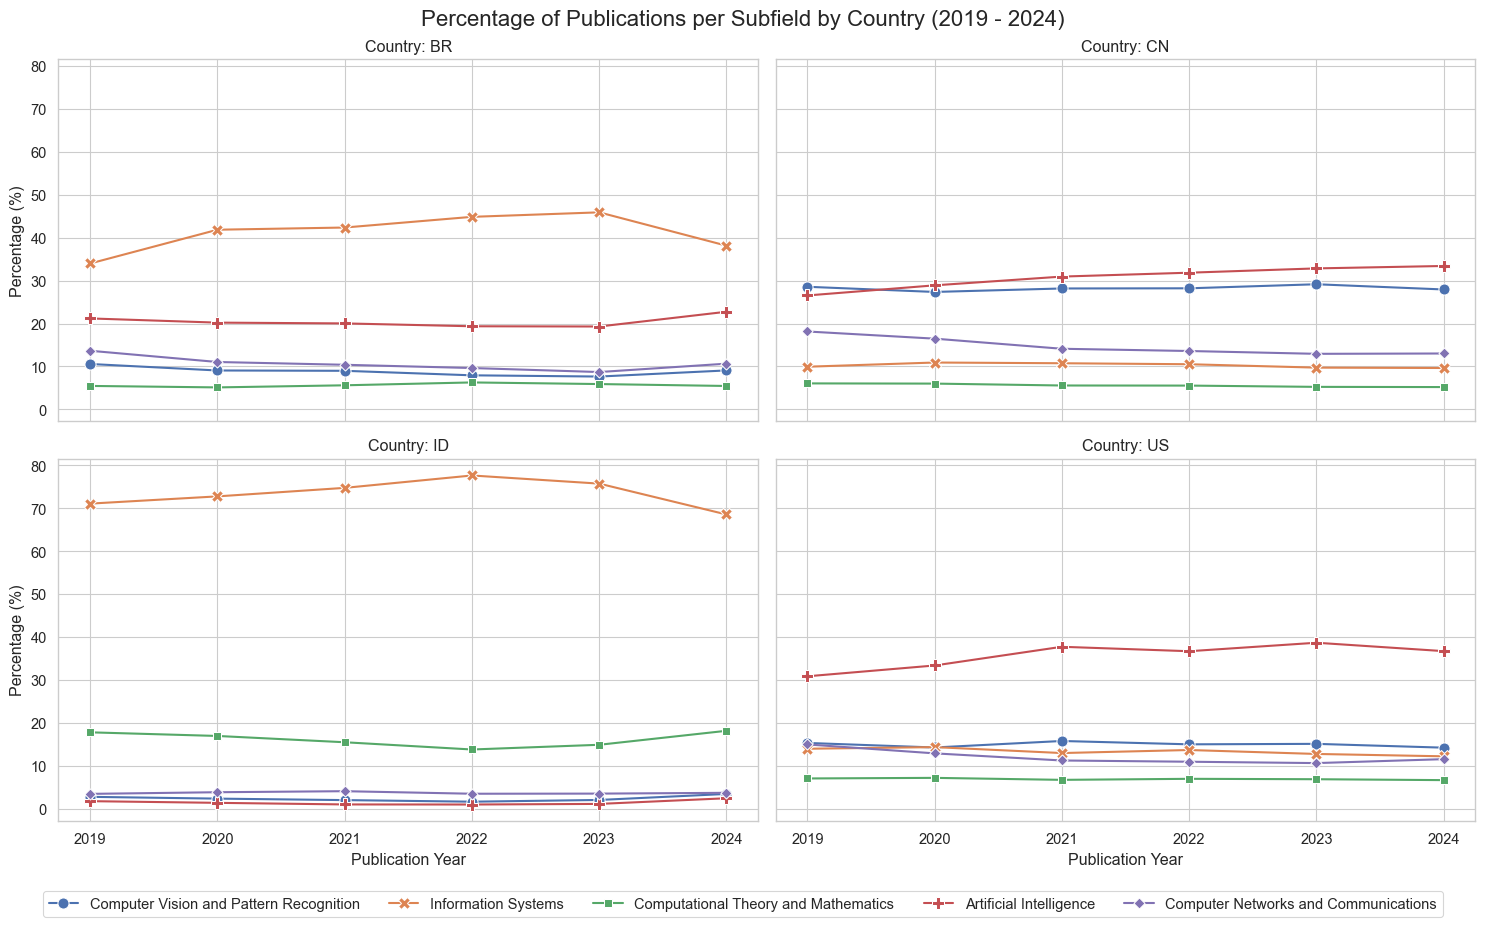

In [3]:
plot_publication_percentages_by_country(countries_subfields_df)
plt.show()

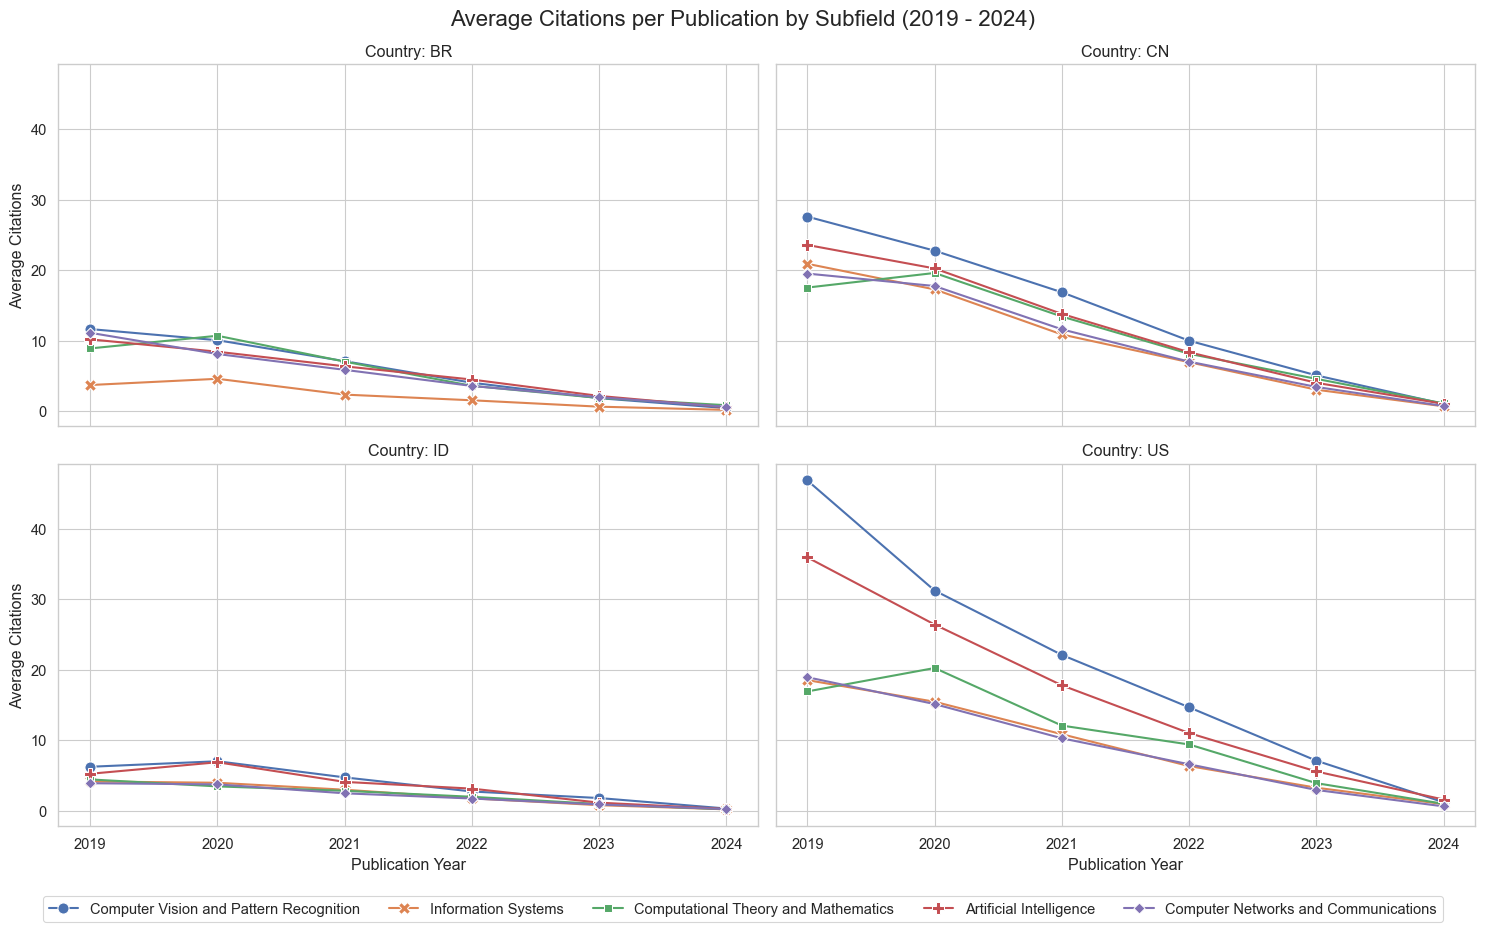

In [4]:
plot_avg_citations_by_country(countries_subfields_df)
plt.show()

In [5]:
# all_countries_df = pd.read_csv("../data/csv/elsevier_counts/all_countries_cs.csv")
# all_countries_df

In [6]:
# plot_publication_percentages_by_country(all_countries_df)
# plt.show()